In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix # pip install scikit-learn

In [2]:
# K-means visualization
def plot(X, y, centers=None):
    plt.rcParams["figure.figsize"] = (5,5)

    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.2)

    if centers is not None:
        plt.scatter(centers[:, 0], centers[:, 1], c=[i for i in range(len(centers))], alpha=1.0, marker='o', s=100, edgecolor='black', linewidth=2)

    plt.axis('equal')
    plt.show()

Training data:


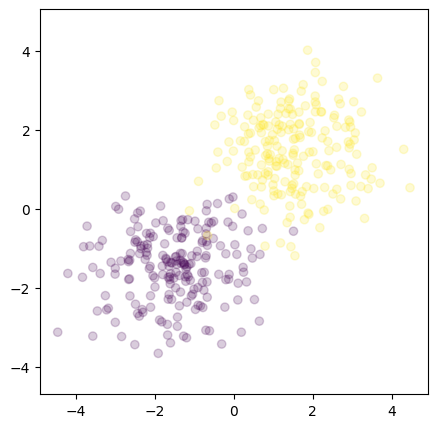

In [3]:
# create synthetic data
mean1 = np.asarray([-1.5, -1.5])
mean2 = np.asarray([1.5, 1.5])
cov = np.asarray([[1,0],[0,1]])

# training set of 2D points with two classes - used to create a model
training_size = 200
X1 = np.random.multivariate_normal(mean1, cov, training_size)
X2 = np.random.multivariate_normal(mean2, cov, training_size)
X_train = np.concatenate((X1, X2), axis=0)
y_train = [0]*training_size + [1]*training_size

print('Training data:')
plot(X_train, y_train)

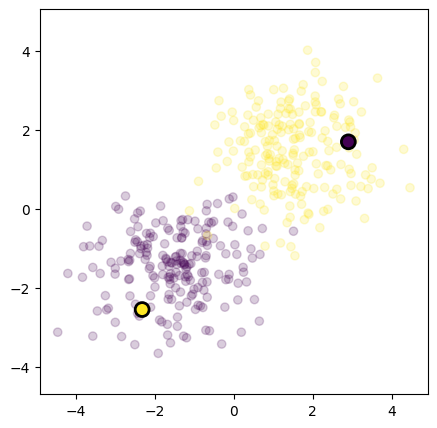

Iteration: 0


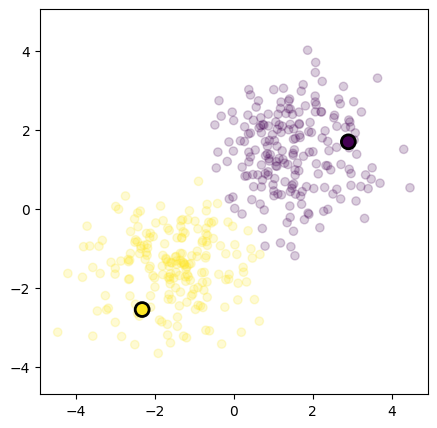

Iteration: 1


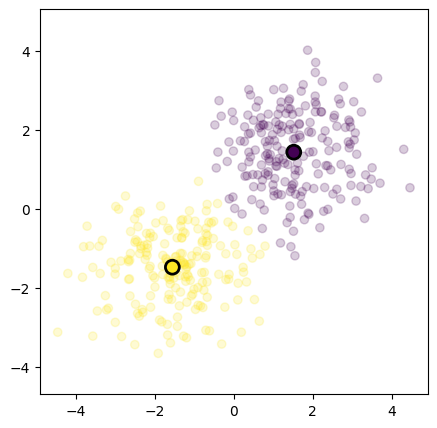

Iteration: 2


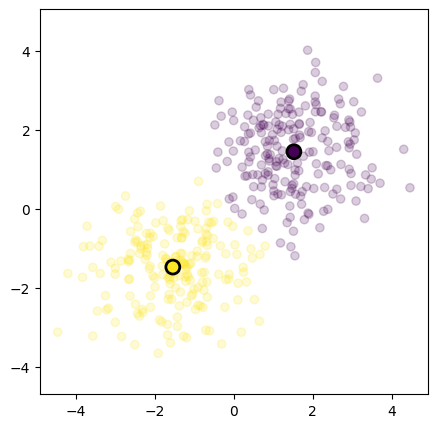

In [10]:
# random initialization of K cluster centroids - labels are not used by K-means
K = 2
indices = np.random.permutation(len(X_train))[:K]
centers = np.take(X_train, indices, axis=0)
plot(X_train, y_train, centers)

# repeat until convergence
old_assignments = np.asarray([-1]*len(X_train))
for iteration in range(100):
    print('Iteration:', iteration)

    # find closest center for each point
    distance_to_centers = np.stack([np.sum((X_train-centers[i])**2, axis=1) for i in range(K)], axis=1)
    assignments = np.argmin(distance_to_centers, axis=1)

    plot(X_train, assignments, centers)

    # stop if closest center assignment doesn't change
    if np.array_equal(old_assignments, assignments):
        break

    # recompute centers with current assignment
    centers = np.stack([np.mean(X_train[assignments == i], axis=0) for i in range(K)], axis=0)

    old_assignments = assignments

In [11]:
def plot_confusion(cm):
    plt.rcParams["figure.figsize"] = (3,3)
    fig, ax = plt.subplots()
    c= ax.matshow(cm, cmap='RdBu')
    fig.colorbar(c, ax=ax)
    for i in range(len(cm)):
        for j in range(len(cm[0])):
            text = ax.text(j, i, cm[i, j], ha='center', va='center', color='w', fontsize=18, weight='bold')
    plt.show()

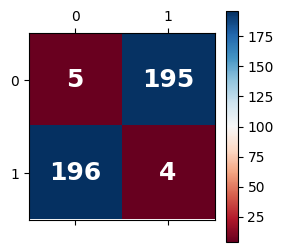

In [12]:
# check how well data is split into two classes
cm = confusion_matrix(y_train, assignments)
plot_confusion(cm)

Testing data:


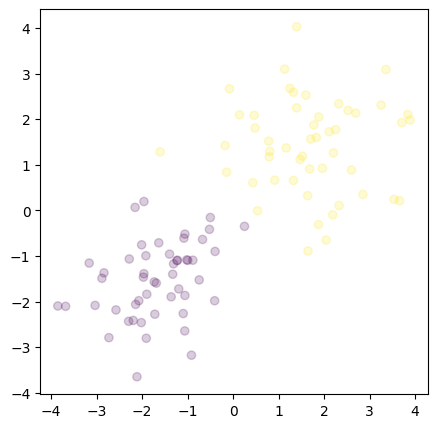

In [13]:
# create synthetic testing data
test_size = 50
X1 = np.random.multivariate_normal(mean1, cov, test_size)
X2 = np.random.multivariate_normal(mean2, cov, test_size)
X_test = np.concatenate((X1, X2), axis=0)
y_test = [0]*test_size + [1]*test_size

print('Testing data:')
plot(X_test, y_test)

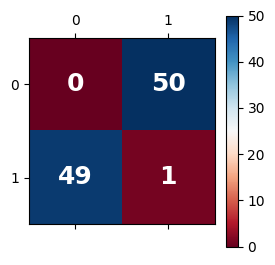

In [14]:
# inference
distance_to_centers = np.stack([np.sum((X_test-centers[i])**2, axis=1) for i in range(K)], axis=1)
y_pred = np.argmin(distance_to_centers, axis=1)

cm = confusion_matrix(y_test, y_pred)
plot_confusion(cm)